<a href="https://colab.research.google.com/github/A01795331/estefania/blob/main/Actividad9RLog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 9**
Regresión Logística

---

*   NOMBRE: ---------------------------------------------------------
*   MATRÍCULA: ----------------------------------------------------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 9/Actividad9_RLog"
os.chdir(DIR)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_df = pd.read_csv('data.csv')
data_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# **Parte 1**. EDA

Haz que el `id` sea el índice del dataframe y efectúa una exploración inicial de los datos a través de:

In [ ]:
data_df.set_index('id', inplace=True)



1a) Estadísticas descriptivas para todas las variables del dataframe.

In [ ]:
# Estadísticas descriptivas
estadescrip = data_df.describe()
print(estadescrip)

       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

1b) Valores únicos por variable para identificar posibles variables categóricas.

In [ ]:
# Valores únicos por variable
ValoresUnicos = data_df.nunique()
print(ValoresUnicos)


diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64


1c) Búsqueda de valores faltantes.

In [ ]:
# Búsqueda de valores faltantes
ValoresFaltantes = data_df.isnull().sum()
print(ValoresFaltantes)


diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


1d) Diagrama de barras para determinar la frecuencia de los diagnósticos (cantidad de observaciones con resultado benigno y maligno)

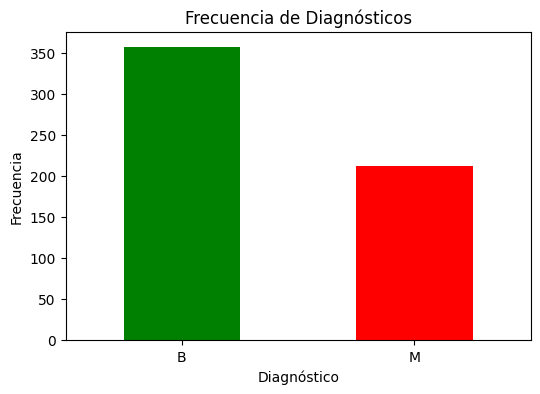

In [ ]:
import matplotlib.pyplot as plt

# Contar la frecuencia de diagnósticos
diagnosis_counts = data_df['diagnosis'].value_counts()

# Crear el diagrama de barras
plt.figure(figsize=(6, 4))
diagnosis_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Frecuencia de Diagnósticos')
plt.xlabel('Diagnóstico')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()


2. Como hay tres valores relacionados con la misma característica (`mean`, `se` y `worst`) es muy probable que exista multicolinealidad en el conjunto.

La multicolinealidad en regresión es una condición que ocurre cuando algunas variables predictoras están fuertemente correlacionadas entre sí, de tal manera que si se incluyen simultáneamente en un modelo, impiden explicar de manera correcta el efecto que cada una tiene sobre la variable respuesta. Existen muchas formas de analizar si hay colinealidad en los modelos, una de ellas es el alto coeficiente de correlación entre variables.

Para observar este efecto, elabora un mapa de calor que cuantifique la correlación de las variables numéricas en el dataframe.

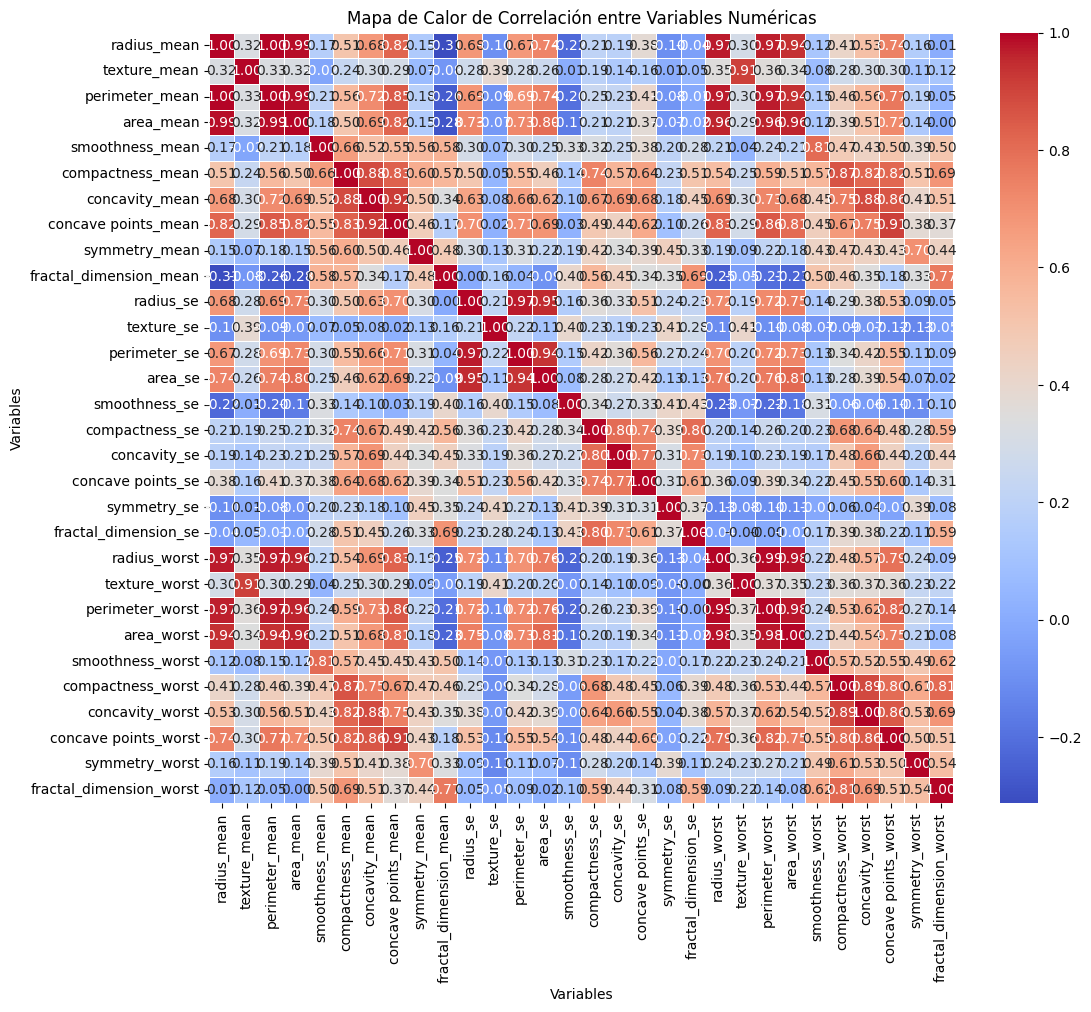

In [ ]:
import seaborn as sns

# Seleccionar solo columnas numéricas
numeric_columns = data_df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Crear un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Mapa de Calor de Correlación entre Variables Numéricas')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()


Si te fijas en los valores de correlación entre las variables `_mean` y `_worst` es evidente la multicolinearidad.

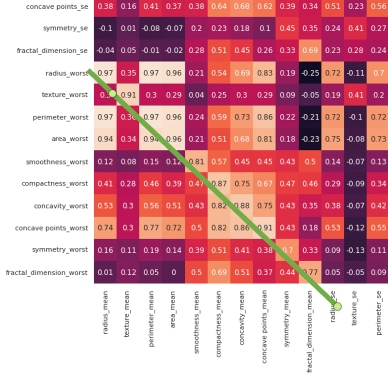

Por ejemplo, la columna `radius_mean` tiene una correlación de 0.97 con la columna `radius_worst`. Esto es algo inevitable, porque las columnas "peores" son esencialmente solo un subconjunto de las columnas "medias".

Para solucionar el problema numérico de la multicolinealidad, tradicionalmente se recurre a eliminar variables o efectuar análisis de componentes principales (PCA) con las `X`’s y usar los componentes como variables independientes en un modelo final.

Conduciremos esta actividad en esos dos sentidos.


# **Parte 2**. Modelo con eliminación de variables altamente correlacionadas  

Elimina las variables altamente correlacionadas:

3a) Ahora que sabes que las variables `_mean` y `_worst` tienen correlación alta, hay que quitar del dataframe un conjunto. Borra las columnas `_worst`.

In [ ]:
# Eliminar columnas que contienen la subcadena "_worst"
data_df = data_df.drop(data_df.filter(like='_worst').columns, axis=1)

# Nuevo  dataframe sin las columnas "_worst"
print(data_df.head())


         diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           M        17.99         10.38          122.80     1001.0   
842517           M        20.57         17.77          132.90     1326.0   
84300903         M        19.69         21.25          130.00     1203.0   
84348301         M        11.42         20.38           77.58      386.1   
84358402         M        20.29         14.34          135.10     1297.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760          0.3001   
842517            0.08474           0.07864          0.0869   
84300903          0.10960           0.15990          0.1974   
84348301          0.14250           0.28390          0.2414   
84358402          0.10030           0.13280          0.1980   

          concave points_

3b. Entre las variables `_mean`, identifica patrones lineales con diagramas de dispersión usando:



```Python
sns.pairplot(data=data_df[['radius_mean',
        'texture_mean',
        'perimeter_mean',
        'area_mean',
        'smoothness_mean',
        'compactness_mean',
        'concavity_mean',
        'concave points_mean',
        'symmetry_mean',
        'fractal_dimension_mean']])
```




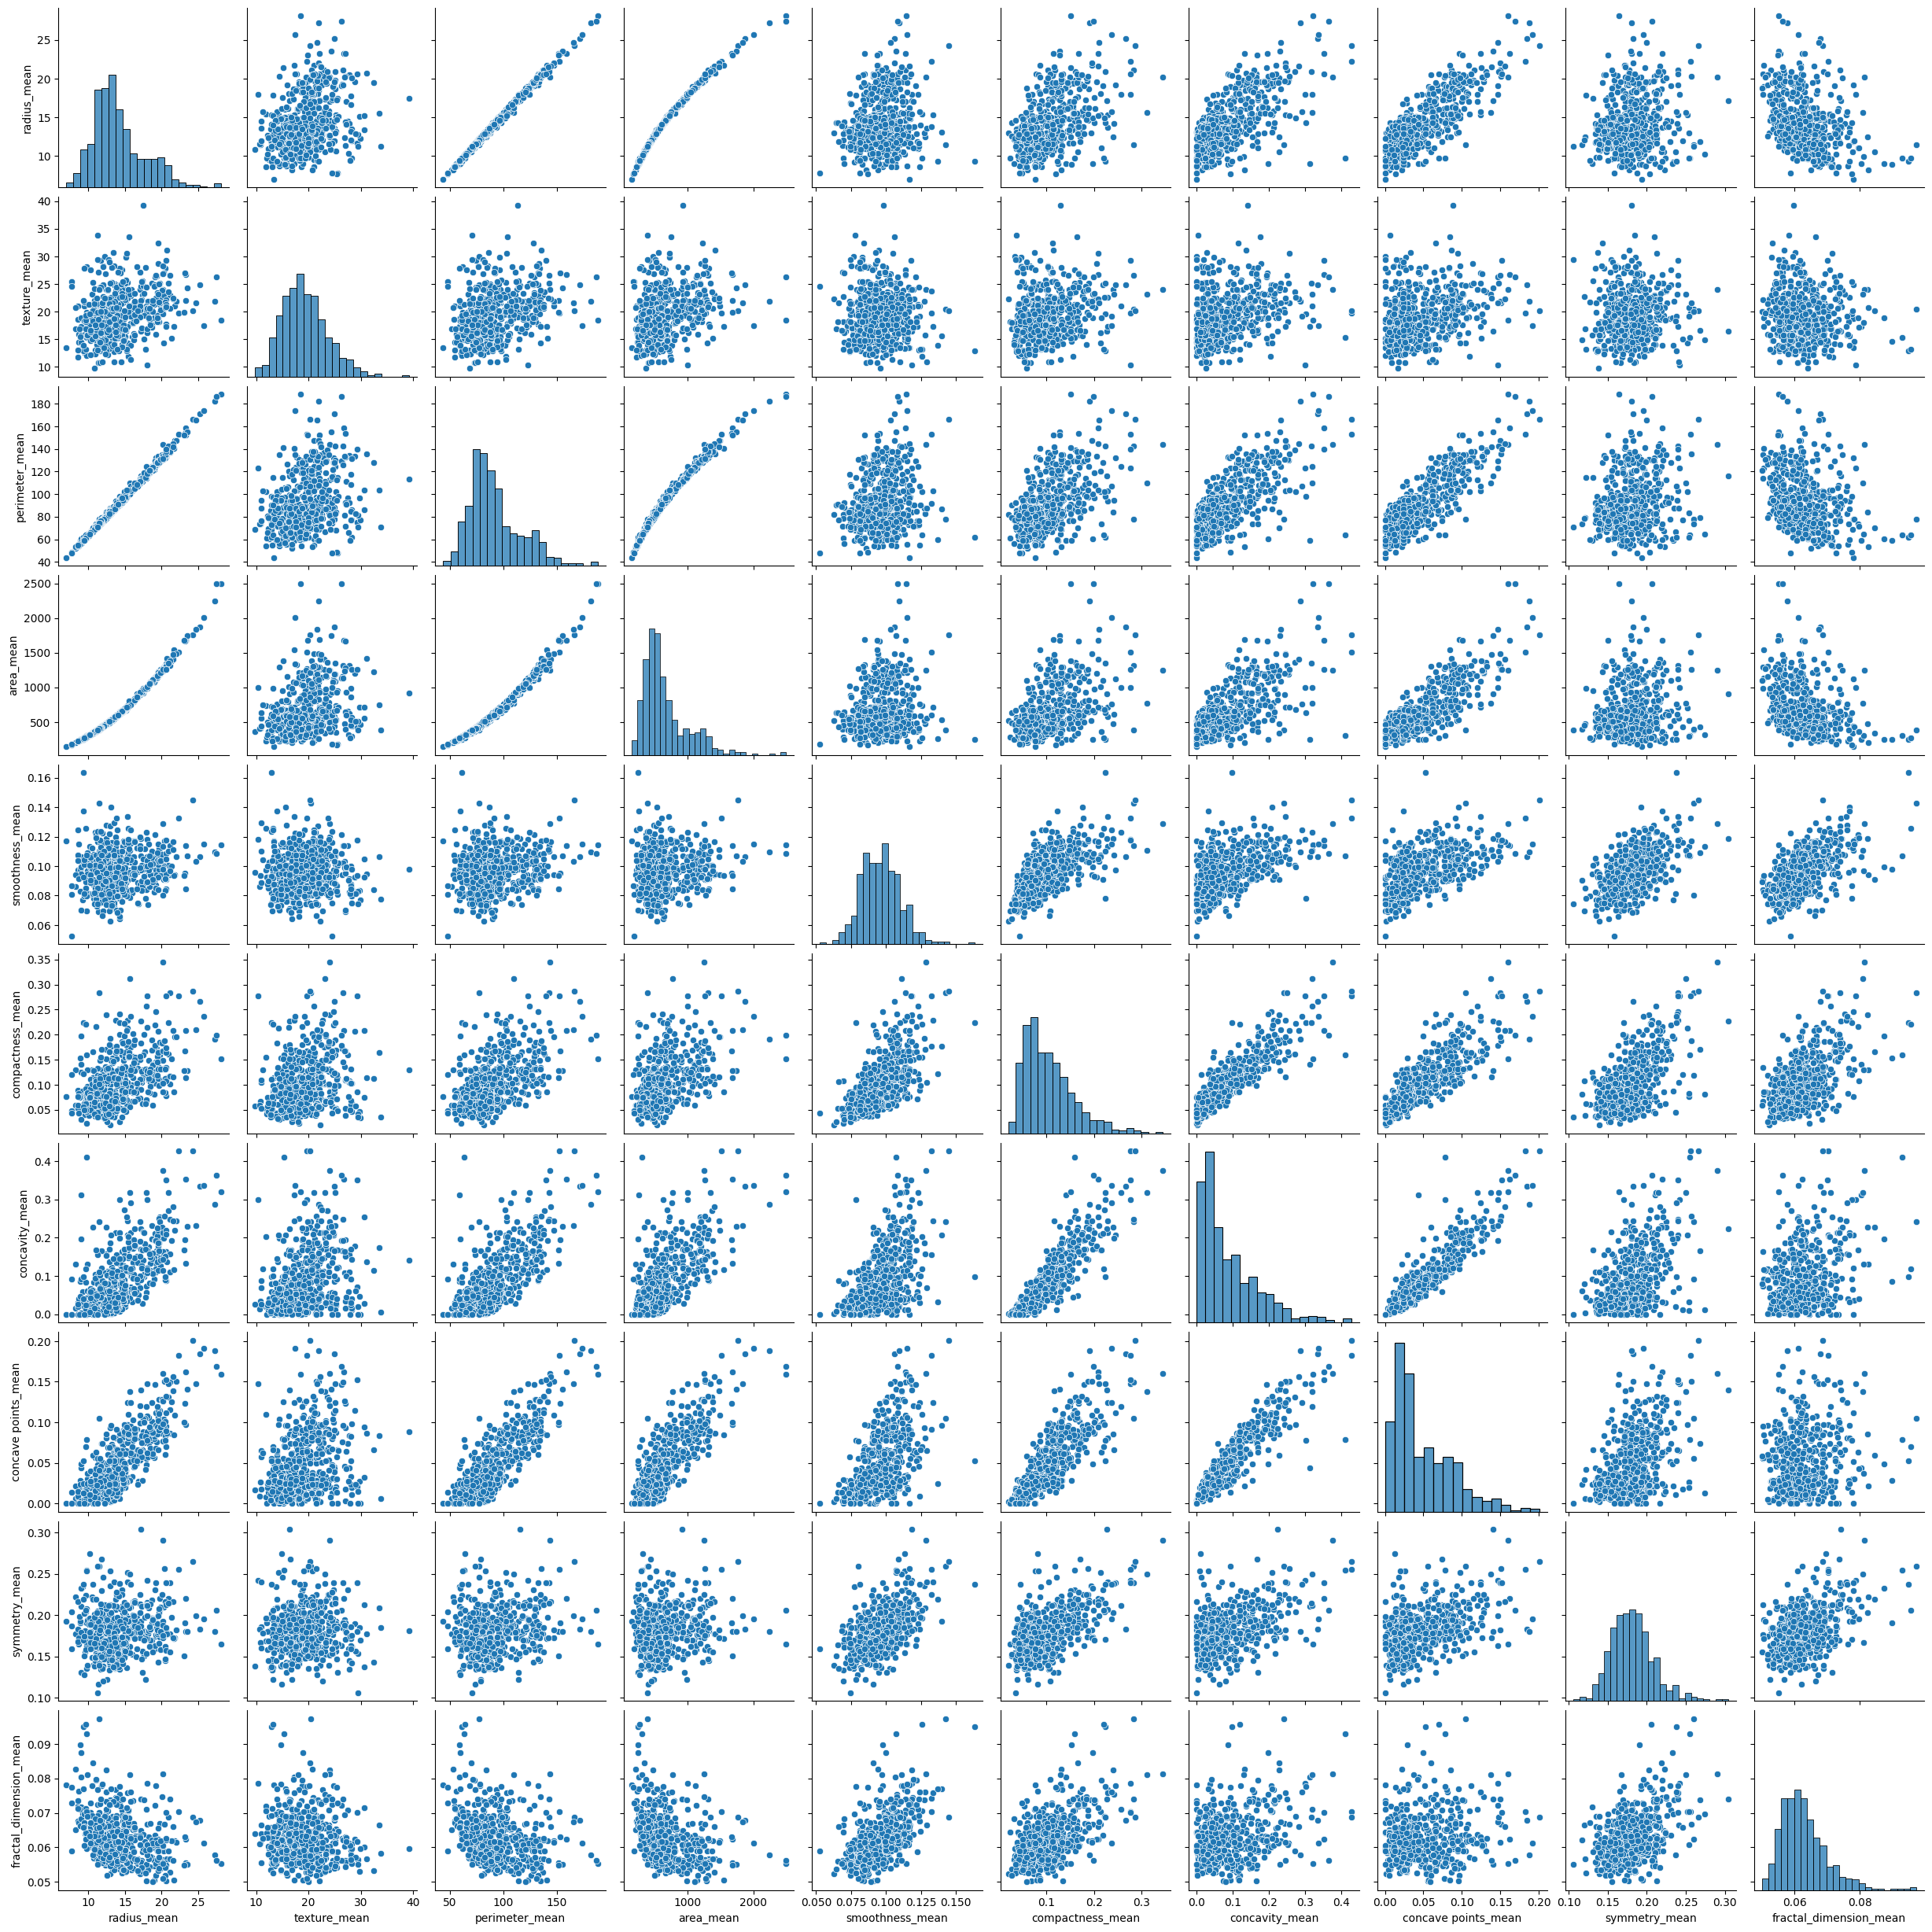

In [ ]:
sns.pairplot(data=data_df[['radius_mean',
        'texture_mean',
        'perimeter_mean',
        'area_mean',
        'smoothness_mean',
        'compactness_mean',
        'concavity_mean',
        'concave points_mean',
        'symmetry_mean',
        'fractal_dimension_mean']])

De la matriz podrás observar relaciones lineales bastante evidentes entre:


*   `radius_mean`, `perimeter_mean` y `area_mean`
*   `compactness_mean`, `concavity_mean`, `concave_points_mean`

Sabemos que el perímetro y el área de un círculo, se calculan a partir del radio. Entonces, la relación entre las primeras tres variables es muy clara para nosotros.

3c) Elabora otro mapa de calor confirmar con los valores de correlación.


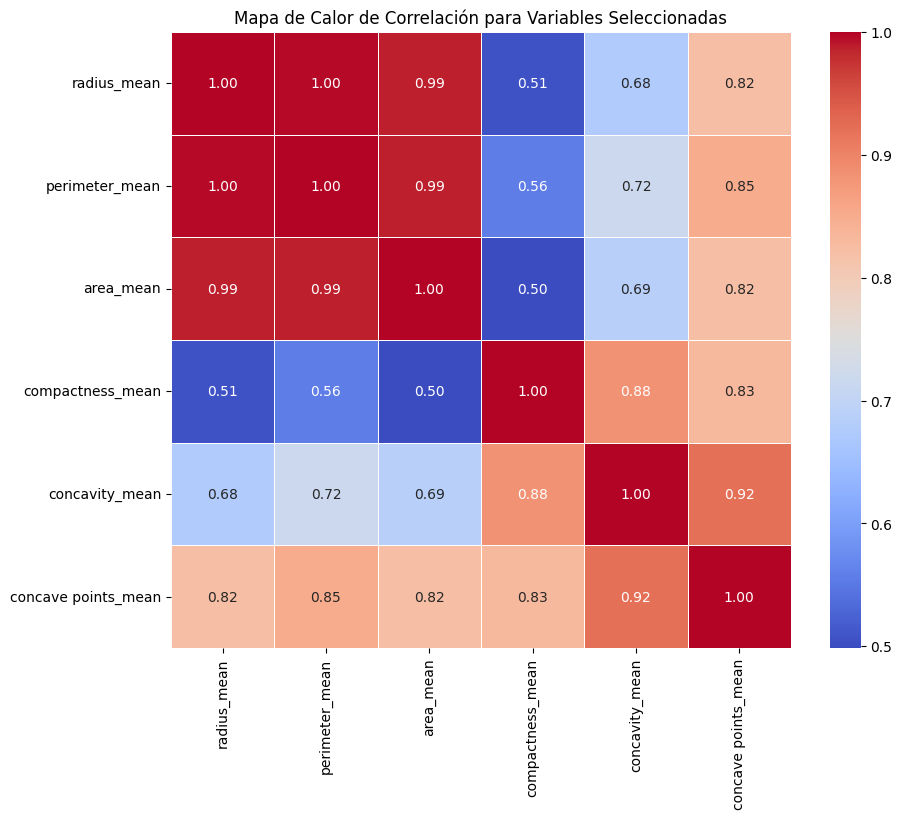

In [ ]:
# Seleccionar las variables de interés
selected_columns = ['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean']

# Calcular la matriz de correlación
correlation_matrix_selected = data_df[selected_columns].corr()

# Crear un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_selected, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Mapa de Calor de Correlación para Variables Seleccionadas')
plt.show()


3d) Después de observar los valores, nos quedaremos con sólo una variable de cada trío: `radius_mean` y `compactness_mean`. Elimina las restantes, no sólo del conjunto `_mean`, sino también de `_se`.

In [ ]:
# Columnas específicas que queremos eliminar
columns_to_remove = [
    'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean',
    'perimeter_se', 'area_se', 'concavity_se', 'concave points_se'
]

# Eliminar las columnas seleccionadas del DataFrame
data_df.drop(columns_to_remove, axis=1, inplace=True)
data_df.info()






<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   smoothness_mean         569 non-null    float64
 4   compactness_mean        569 non-null    float64
 5   symmetry_mean           569 non-null    float64
 6   fractal_dimension_mean  569 non-null    float64
 7   radius_se               569 non-null    float64
 8   texture_se              569 non-null    float64
 9   smoothness_se           569 non-null    float64
 10  compactness_se          569 non-null    float64
 11  symmetry_se             569 non-null    float64
 12  fractal_dimension_se    569 non-null    float64
dtypes: float64(12), object(1)
memory usage: 62.2+ KB


Observa la distribución de las variables resultantes (deben ser 12):

4a) Utilizando histogramas. Guarda en una variable (`skew_cols`) las que tengan marcado sesgo positivo. Para dar seguridad a tu selección, elige aquellas cuyo resultado de aplicar la función `skew()` sea mayor a 1.

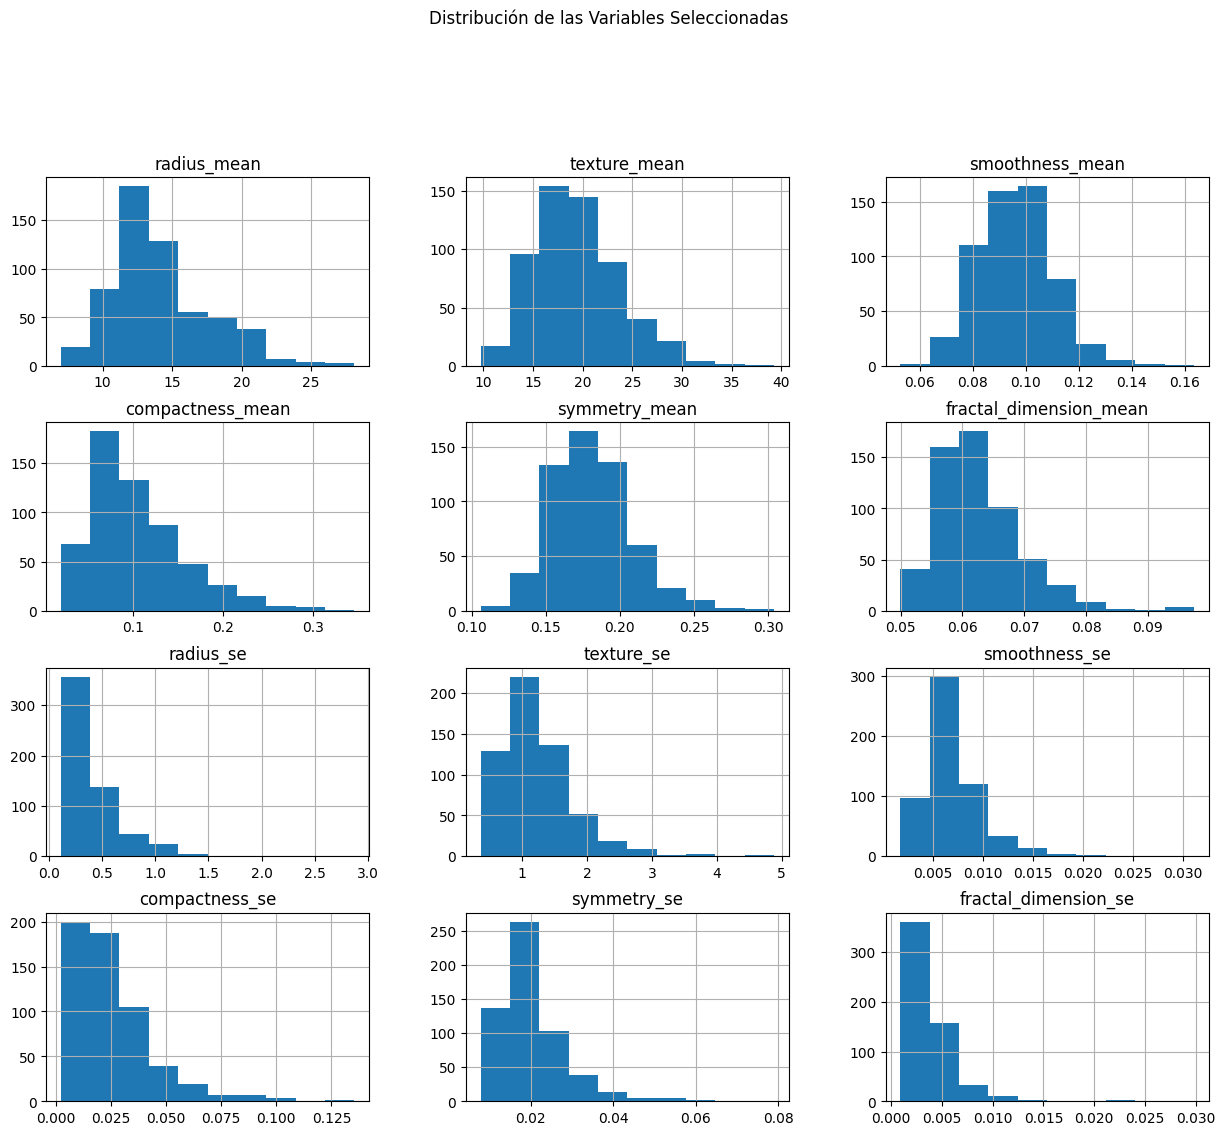

Variables con sesgo positivo:
Index(['compactness_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'smoothness_se', 'compactness_se', 'symmetry_se',
       'fractal_dimension_se'],
      dtype='object')


In [ ]:
import seaborn as sns

# Seleccionar solo las columnas numéricas
numeric_columns = data_df.select_dtypes(include=['float64']).columns

# Visualizar histogramas para las variables seleccionadas
data_df[numeric_columns].hist(figsize=(15, 12))
plt.suptitle('Distribución de las Variables Seleccionadas', y=1.02)
plt.show()

# Calcular el sesgo (skewness) para cada variable
skewness = data_df[numeric_columns].apply(lambda x: x.skew())

# Seleccionar las variables con sesgo positivo (skewness > 1)
skew_cols = skewness[skewness > 1].index

# Mostrar las variables con sesgo positivo
print("Variables con sesgo positivo:")
print(skew_cols)


4b) Dibujando box plots de todas las variables. Guarda en una variable (`scale_cols`) aquellas que no se encuentren en el intervalo [0,1]


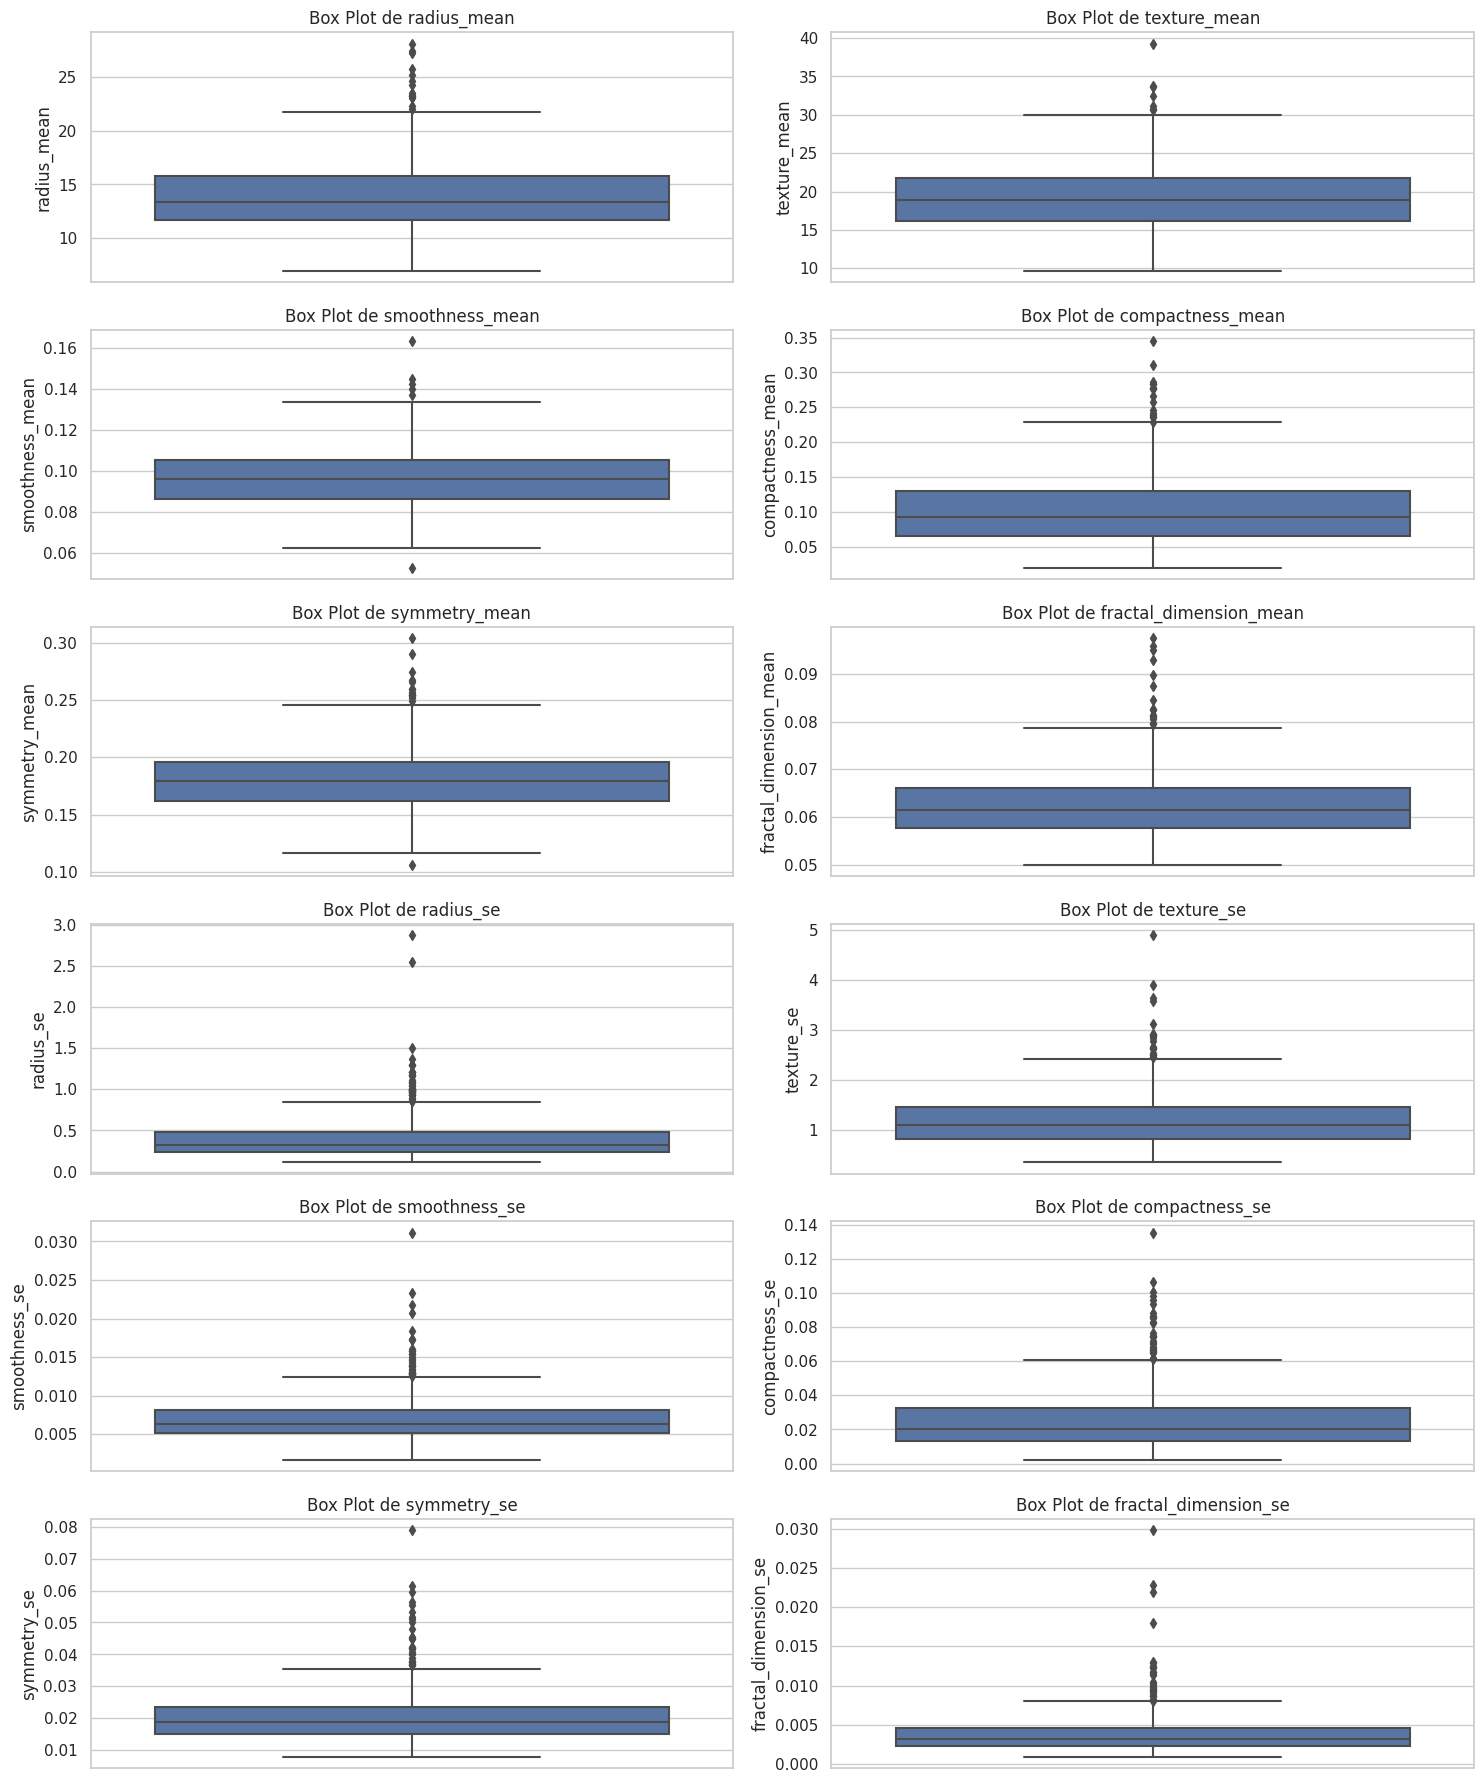

Variables numéricas que no se encuentran en el intervalo [0, 1]:
Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'smoothness_se', 'compactness_se', 'symmetry_se',
       'fractal_dimension_se'],
      dtype='object')


In [ ]:
import seaborn as sns

# Establecer el estilo de los gráficos con sns.set
sns.set(style="whitegrid")

# Crear subgráficos para cada box plot
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(15, 18))

# Aplanar la matriz de subgráficos
axes = axes.flatten()

# Visualizar box plots para todas las variables
for i, col in enumerate(numeric_columns):
    sns.boxplot(y=data_df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot de {col}')

# Ajustar la disposición y mostrar la figura
plt.tight_layout()
plt.show()

# Seleccionar solo las columnas numéricas
numeric_columns = data_df.select_dtypes(include=['float64']).columns

# Seleccionar las variables que no se encuentren en el intervalo [0, 1]
scale_cols = data_df[numeric_columns][(data_df[numeric_columns] < 0) | (data_df[numeric_columns] > 1)].columns

# Mostrar las variables que no se encuentran en el intervalo [0, 1]
print("Variables numéricas que no se encuentran en el intervalo [0, 1]:")
print(scale_cols)





Con todo el análisis anterior, estamos listos para generar un modelo *baseline* denominado `logr_model`. Para ello:

5a) Vuelve a leer el contenido del archivo, haz que el `id` sea el índice y separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`diagnosis`). Divide el conjunto en entrenamiento y prueba (80:20) considerando el parámetro `random_state` con el valor de 1.

In [ ]:
from sklearn.model_selection import train_test_split

# Leer el contenido del archivo nuevamente
data_df = pd.read_csv('data.csv')
data_df.set_index('id', inplace=True)

# Separar las variables en X (predictores) e y (variable de respuesta)
X = data_df.drop('diagnosis', axis=1)
y = data_df['diagnosis']

# Dividir el conjunto en entrenamiento y prueba (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Mostrar las formas de los conjuntos de entrenamiento y prueba
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)


Forma de X_train: (455, 30)
Forma de X_test: (114, 30)
Forma de y_train: (455,)
Forma de y_test: (114,)


5b) Prepara un transformador, denominado `preprocessing`, para borrar las columnas altamente correlacionadas (las 18 variables que se determinaron en los ejercicios previos) Asegúrate de incluir el parámetro `remainder='passthrough'` para mantener el resto de las variables.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Lista de variables a conservar
variables_a_conservar = ['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'concave points_mean',
                          'radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 'concave points_se',
                          'diagnosis', 'radius_worst']

# Lista de variables a eliminar
variables_a_eliminar = [col for col in X.columns if col not in variables_a_conservar]

# Crear el transformador
preprocessing = ColumnTransformer(
    transformers=[
        ('eliminar_correlacionadas', 'drop', variables_a_eliminar)
    ],
    remainder='passthrough'
)

# Transformar los conjuntos de entrenamiento y prueba
X_train_transformed = preprocessing.fit_transform(X_train)
X_test_transformed = preprocessing.transform(X_test)

# Mostrar las formas de los conjuntos de entrenamiento y prueba después de la transformación
print("Forma de X_train_transformed:", X_train_transformed.shape)
print("Forma de X_test_transformed:", X_test_transformed.shape)


Forma de X_train_transformed: (455, 11)
Forma de X_test_transformed: (114, 11)


5c) Entrena el modelo `logr_model` con el transformador `preprocessing` y  regresión logística.

Como la salida `y` está en términos de las etiquetas `'B'` y `'M'`, en lugar de 0 y 1, para evaluar el modelo en el conjunto de prueba deberás especificar la clase positiva. En el caso de la matriz de confusión, indica el orden de las etiquetas con `labels=['B','M']`, porque `'B'` es la clase negativa (ésta se especifica primero) y `'M'` la positiva. Para las métricas de *recall* y *precision*, utiliza el parámetro `pos_label='M'`. Como *accuracy* ocupa la suma de ambas clases y el total de las observaciones, no requiere ninguna especificación. Si quisieras omitir estos parámetros, tendrías que sustituir `'B'` por 0 y `'M'` por 1, previo a la construcción del modelo.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Crear y entrenar el modelo logístico
logr_model = LogisticRegression(random_state=1)
logr_model.fit(X_train_transformed, y_train)

# Predecir en el conjunto de prueba
y_pred = logr_model.predict(X_test_transformed)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred, labels=['B', 'M'])

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='M')
recall = recall_score(y_test, y_pred, pos_label='M')

# Mostrar resultados
print("Matriz de Confusión:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Matriz de Confusión:
[[71  1]
 [ 5 37]]

Accuracy: 0.9473684210526315
Precision: 0.9736842105263158
Recall: 0.8809523809523809


Para generar un modelo `logr_model2` con transformación y escalamiento:

6a) Modifica el transformador anterior para, además del borrado de las columnas correlacionadas, aplicar la raíz cuadrada a los predictores con sesgo (previamente almacenados en `skew_cols`) y escalamiento *MinMax* a los predictores con escala mayor a 1 (previamente almacenados en `scale_cols`) Como no todos los predictores serán eliminados o transformados, asegúrate de incluir el parámetro `remainder='passthrough'`

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer, MinMaxScaler
from sklearn.pipeline import Pipeline

# Lista de variables a conservar y eliminar (ya definidas previamente)
variables_a_conservar = ['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'concave points_mean',
                          'radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 'concave points_se',
                          'diagnosis', 'radius_worst']
variables_a_eliminar = [col for col in X.columns if col not in variables_a_conservar]

# Lista de variables a aplicar raíz cuadrada (skew_cols) y escalamiento MinMax (scale_cols)
# Estas listas deberían haberse definido previamente
# Por ejemplo, para el ejercicio anterior:
# skew_cols = ['variable1', 'variable2', ...]
# scale_cols = ['variable3', 'variable4', ...]

# Crear el transformador preprocessing2
preprocessing2 = ColumnTransformer(
    transformers=[
        ('eliminar_correlacionadas', 'drop', variables_a_eliminar),
        ('raiz_cuadrada', PowerTransformer(), skew_cols),
        ('escalamiento_minmax', MinMaxScaler(), scale_cols)
    ],
    remainder='passthrough'
)

# Transformar los conjuntos de entrenamiento y prueba
X_train_transformed2 = preprocessing2.fit_transform(X_train)
X_test_transformed2 = preprocessing2.transform(X_test)

# Mostrar las formas de los conjuntos de entrenamiento y prueba después de la transformación
print("Forma de X_train_transformed2:", X_train_transformed2.shape)
print("Forma de X_test_transformed2:", X_test_transformed2.shape)


Forma de X_train_transformed2: (455, 23)
Forma de X_test_transformed2: (114, 23)


6b) Entrena el modelo `logr_model2` con regresión logística, aplicando previamente el transformador modificado. Evalúa el modelo en el conjunto de prueba con las mismas métricas.

In [ ]:
# Crear y entrenar el modelo logístico con el nuevo transformador
logr_model2 = LogisticRegression(random_state=1)
logr_model2.fit(X_train_transformed2, y_train)

# Predecir en el conjunto de prueba
y_pred2 = logr_model2.predict(X_test_transformed2)

# Calcular la matriz de confusión
conf_matrix2 = confusion_matrix(y_test, y_pred2, labels=['B', 'M'])

# Calcular métricas de evaluación
accuracy2 = accuracy_score(y_test, y_pred2)
precision2 = precision_score(y_test, y_pred2, pos_label='M')
recall2 = recall_score(y_test, y_pred2, pos_label='M')

# Mostrar resultados
print("Matriz de Confusión:")
print(conf_matrix2)
print("\nAccuracy:", accuracy2)
print("Precision:", precision2)
print("Recall:", recall2)


Matriz de Confusión:
[[71  1]
 [ 6 36]]

Accuracy: 0.9385964912280702
Precision: 0.972972972972973
Recall: 0.8571428571428571


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **Parte 3**. Modelo con aplicación de PCA

7. Analizaremos el efecto de aplicar PCA a todas las variables. Recuerda que previo a aplicarlo es recomendado escalar todas las variables. Utiliza la clase `StandardScaler` para transformar `X`.

Varianza acumulada:
[0.45240302 0.63050651 0.72699444 0.79213332 0.84647591 0.88772726
 0.91080378 0.92703936 0.94033224 0.95197643 0.96164641 0.97004325
 0.97790224 0.98337919 0.98643273 0.98912596 0.99120389 0.99301528
 0.99453562 0.99556514 0.99653336 0.99748947 0.99832583 0.99893547
 0.99947112 0.9997161  0.99992266 0.99997455 0.9999959  1.        ]


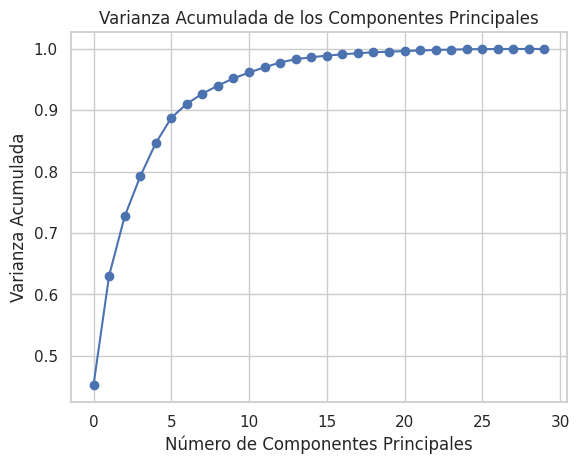

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Crear y ajustar el escalador estándar en el conjunto de entrenamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Aplicar el mismo escalado al conjunto de prueba
X_test_scaled = scaler.transform(X_test)

# Crear y ajustar el modelo PCA en el conjunto de entrenamiento escalado
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

# Calcular la varianza acumulada
explained_variance_ratio_cumulative = pca.explained_variance_ratio_.cumsum()

# Mostrar la varianza acumulada
print("Varianza acumulada:")
print(explained_variance_ratio_cumulative)

# Graficar la varianza acumulada
plt.plot(explained_variance_ratio_cumulative, marker='o')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada')
plt.title('Varianza Acumulada de los Componentes Principales')
plt.show()



8. Aplica PCA al conjunto escalado y determina el número de componentes que explican el 99% de la varianza.

In [ ]:
# Crear y ajustar el modelo PCA en el conjunto de entrenamiento escalado
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

# Calcular la varianza acumulada
explained_variance_ratio_cumulative = pca.explained_variance_ratio_.cumsum()

# Encontrar el número de componentes que explican el 99% de la varianza
num_components_99 = len(explained_variance_ratio_cumulative[explained_variance_ratio_cumulative >= 0.99])

# Mostrar el número de componentes y la varianza acumulada
print("Número de componentes para explicar el 99% de la varianza:", num_components_99)
print("Varianza acumulada correspondiente:", explained_variance_ratio_cumulative[num_components_99 - 1])


Número de componentes para explicar el 99% de la varianza: 14
Varianza acumulada correspondiente: 0.9833791935666951


9. Con el número de componentes determinado, estamos listos para generar un modelo `logr_model3` con PCA. Construye un pipeline que incluya el escalamiento estándar, el PCA con el número de componentes determinado y regresión logística. Entrena el modelo utilizando el  conjunto de entrenamiento y evalúalo en el conjunto de prueba con las mismas métricas.

In [ ]:
from sklearn.metrics import classification_report

# Número de componentes determinado previamente
num_components_99 = 12  # Reemplaza con el valor obtenido

# Construir el pipeline con escalamiento, PCA y regresión logística
logr_model3 = Pipeline([
    ('scaler', StandardScaler()),  # Escalamiento estándar
    ('pca', PCA(n_components=num_components_99)),  # PCA con el número de componentes determinado
    ('logistic_regression', LogisticRegression(random_state=1))  # Regresión logística
])

# Entrenar el modelo con el conjunto de entrenamiento
logr_model3.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred3 = logr_model3.predict(X_test)

# Calcular la matriz de confusión y métricas de evaluación
conf_matrix3 = confusion_matrix(y_test, y_pred3, labels=['B', 'M'])
accuracy3 = accuracy_score(y_test, y_pred3)
precision3 = precision_score(y_test, y_pred3, pos_label='M')
recall3 = recall_score(y_test, y_pred3, pos_label='M')

# Mostrar resultados
print("Matriz de Confusión:")
print(conf_matrix3)
print("\nAccuracy:", accuracy3)
print("Precision:", precision3)
print("Recall:", recall3)

# Mostrar el informe de clasificación
classification_rep = classification_report(y_test, y_pred3, target_names=['B', 'M'])
print("\nInforme de Clasificación:")
print(classification_rep)



Matriz de Confusión:
[[71  1]
 [ 2 40]]

Accuracy: 0.9736842105263158
Precision: 0.975609756097561
Recall: 0.9523809523809523

Informe de Clasificación:
              precision    recall  f1-score   support

           B       0.97      0.99      0.98        72
           M       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



10. En un modelo de diagnóstico médico, ¿cuál consideras que es la métrica más importante? ¿Cómo cambiarías (disminuir/aumentar) el *threshold*? ¿Por qué?

En el marco de modelos predictivos para diagnóstico médico, la calibración del umbral se presenta como un ejercicio técnico-estadístico fundamental. Se busca optimizar la relación entre sensibilidad y especificidad, representadas respectivamente por la tasa de verdaderos positivos y la tasa de verdaderos negativos. Ajustar el umbral implica hallar el punto de operación que maximice la precisión en la identificación de casos positivos o negativos, según los requisitos clínicos específicos, manteniendo el equilibrio entre la detección eficaz y la minimización de diagnósticos incorrectos. Este proceso, esencial en el diseño de modelos predictivos médicos, demanda una colaboración estrecha entre expertos en salud y analistas de datos.